# Convolutional Neural network

In [1]:
# lets build a small convents to classify MNIST dataset

In [1]:
from keras.layers import  *
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))  # 10 outputs in MNIST dataset

In [20]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [21]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [22]:
(XTrain, YTrain),(XTest, YTest) = mnist.load_data()

In [23]:
XTrain.shape

(60000, 28, 28)

In [24]:
def preproccess_data(X,Y):
    X = X.reshape((-1,28,28,1))
    X = X/255.0

    Y = to_categorical(Y)

    return X,Y

In [25]:
XTrain, YTrain = preproccess_data(XTrain,YTrain)

In [26]:
XTrain.shape, YTrain.shape

((60000, 28, 28, 1), (60000, 10))

In [27]:
XTest, YTest = preproccess_data(XTest, YTest)

In [28]:
XTest.shape, YTest.shape

((10000, 28, 28, 1), (10000, 10))

In [29]:
# Compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
# Training
hist = model.fit(XTrain, YTrain,epochs=10, validation_split=0.3, batch_size=128)

Epoch 1/10
329/329 [==============================] - 14s 43ms/step - loss: 0.0112 - accuracy: 0.9963 - val_loss: 0.0101 - val_accuracy: 0.9969

In [44]:
model.evaluate(XTest, YTest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0359 - accuracy: 0.9911

[0.035885751247406006, 0.991100013256073]

## Data Augmentation
- Deep learning models are 'data hungry'
- Small datasets lead to overfitting most of the times
- So lets generate more data by augmenting the training samples
- Improves accuracy

In [31]:
img_path = "/Users/apoorvgarg/Documents/GitHub/machine-learning-online-2018/Datasets/Images/images/horses/horse-24.jpg"

In [36]:
from matplotlib import pyplot as plt
from keras.preprocessing import image

In [37]:
img = image.load_img(img_path,target_size=(100,100))

In [40]:
x = image.img_to_array(img)/255.0

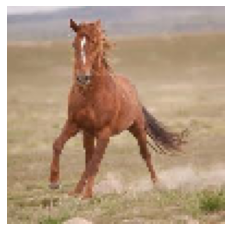

In [42]:
plt.imshow(x)
plt.axis('off')
plt.show()

In [45]:
x = x.reshape((1,100,100,3))

In [46]:
datagen = image.ImageDataGenerator(
    rotation_range= 30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


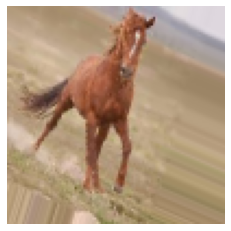

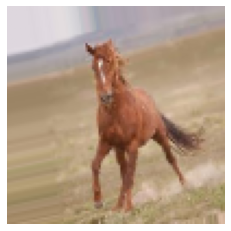

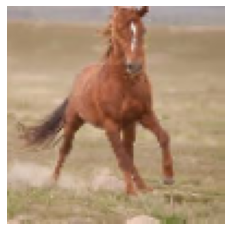

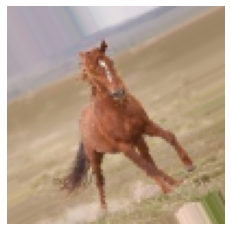

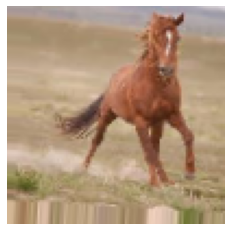

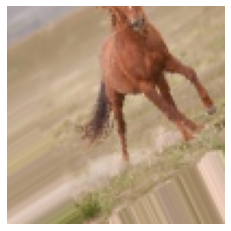

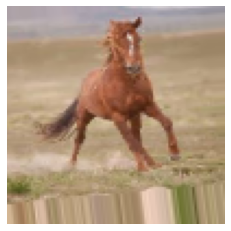

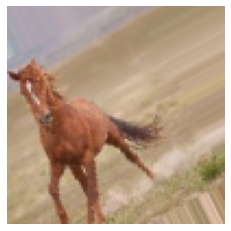

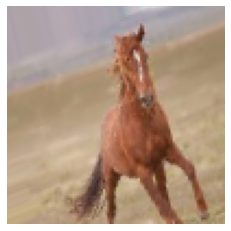

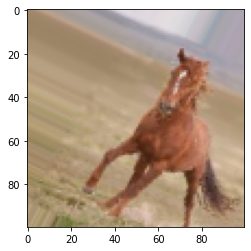

In [50]:
i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure()
    imgplot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i == 10:
        break
    plt.axis('off')
    plt.show()

In [ ]:
plt.imshow(x[0])